In [86]:
import pandas as pd
from sklearn.neighbors import BallTree
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
test_cells = pd.read_csv("data/9_3_2_BEMS342281.csv")


In [88]:
tree = BallTree(test_cells[["X_centroid", "Y_centroid"]], leaf_size=2)

In [89]:
def query_ball_tree(radius: int):
    indexes, _ = tree.query_radius(test_cells[["X_centroid", "Y_centroid"]], r=radius,
                                           return_distance=True, sort_results=True)

    return indexes


def get_outliers(indexes: []):
    
    outliers = []
    for index in indexes:
        if len(index) == 1:
            outliers.append(index[0])
            
    return outliers

In [90]:
thirty_r_cells = query_ball_tree(30)
thirty_outlier_indexes = get_outliers(thirty_r_cells)
thirty_outlier_cells = test_cells.iloc[thirty_outlier_indexes]
thirty_outlier_cells.shape

(266, 42)

In [91]:
fourty_five_r_cells = query_ball_tree(45)
fourty_five_outlier_indexes = get_outliers(fourty_five_r_cells)
fourty_five_outlier_cells = test_cells.iloc[fourty_five_outlier_indexes]
fourty_five_outlier_cells.shape

(58, 42)

In [92]:
sixty_r_cells = query_ball_tree(60)
sixty_outlier_indexes = get_outliers(sixty_r_cells)
sixty_outlier_cells = test_cells.iloc[sixty_outlier_indexes]
sixty_outlier_cells.shape

(38, 42)

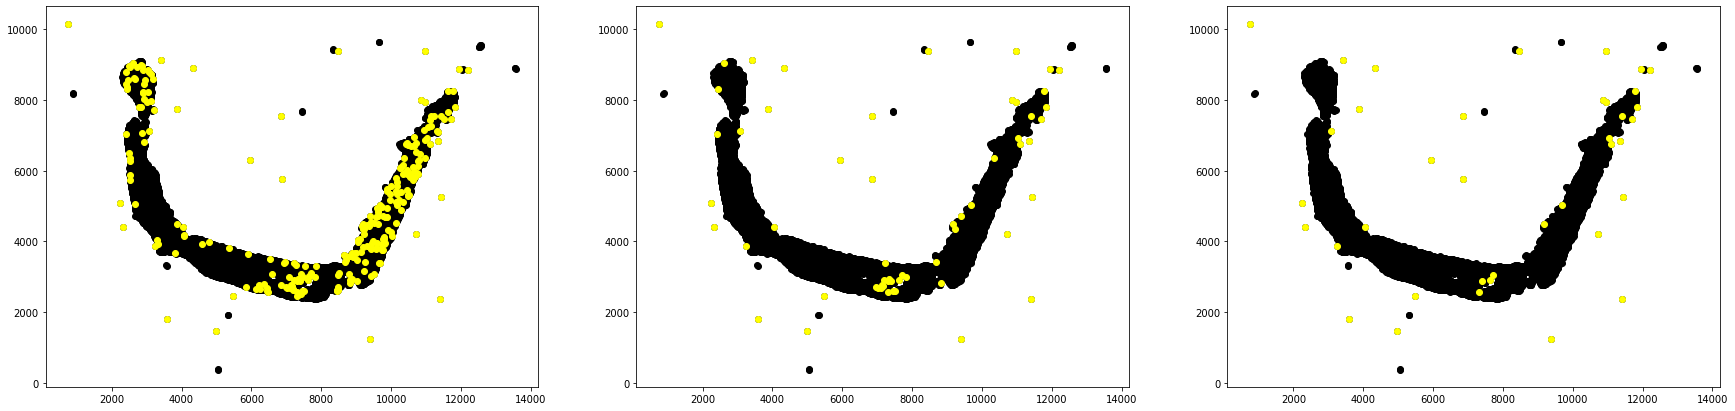

In [93]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)

ax1.scatter(x=test_cells["X_centroid"], y=test_cells["Y_centroid"], facecolors="black")
ax1.scatter(x=thirty_outlier_cells["X_centroid"], y=thirty_outlier_cells["Y_centroid"], color="yellow")

ax2.scatter(x=test_cells["X_centroid"], y=test_cells["Y_centroid"], facecolors="black")
ax2.scatter(x=fourty_five_outlier_cells["X_centroid"], y=fourty_five_outlier_cells["Y_centroid"], color="yellow")

ax3.scatter(x=test_cells["X_centroid"], y=test_cells["Y_centroid"], facecolors="black")
ax3.scatter(x=sixty_outlier_cells["X_centroid"], y=sixty_outlier_cells["Y_centroid"], color="yellow")

fig.set_size_inches(30,7)

# Evaluatate neighbor count for a given radius



In [98]:
radius = 30

selected_cells = query_ball_tree(30)
selected_cells = [index for index in selected_cells if len(index) > 1]
len(selected_cells)

print(f"Preserved {len(selected_cells)/len(test_cells) * 100}% of original cells")

Preserved 98.6524140027357% of original cells


In [116]:
neighbor_count_data = []

for cell in selected_cells:
    neighbor_count_data.append({
        "Cell" : cell[0],
        "Neighbor Count": len(cell) - 1
    })
    
    
neighbor_count = pd.DataFrame().from_records(neighbor_count_data)
neighbor_count

#print(neighbor_count["Neighbor Count"].unique())
#print(neighbor_count["Neighbor Count"].value_counts())

,Cell,Neighbor Count
0,0,1
1,1,1
2,5,1
3,6,1
4,7,5
...,...,...
19468,19733,1
19469,19734,1
19470,19735,1
19471,19736,1


## Plot distribution of neighbor count

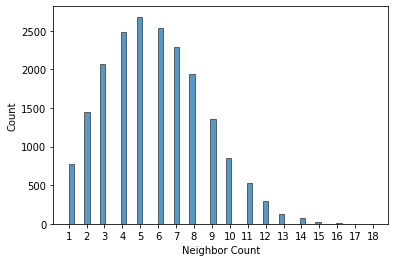

In [115]:
ax = sns.histplot(data=neighbor_count, x="Neighbor Count")
plt.xticks(neighbor_count["Neighbor Count"].unique())
plt.show()